In [ ]:
#start by Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#Load the Dataset
data = pd.read_csv('/content/Killed_Seriously_Injured_Data_2017to2023.csv')

#Display the first and last few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("Last 5 rows of the dataset:")
print(data.tail())


First 5 rows of the dataset:
   OBJECTID     INDEX  ACCNUM                  DATE  TIME             STREET1  \
0     13239  80734609     NaN  1/1/2017 10:00:00 AM  1405      57 BIMINI CRES   
1     13240  80890115     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
2     13241  80890116     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
3     13242  80890117     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   
4     13243  80890118     NaN  1/3/2017 10:00:00 AM    10  F G GARDINER XY  E   

       STREET2        OFFSET ROAD_CLASS        DISTRICT  ...  REDLIGHT  \
0          NaN  9 m South of      Local  Etobicoke York  ...       NaN   
1  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
2  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
3  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   
4  KIPLING AVE  900 m West o        NaN  Etobicoke York  ...       NaN   

   ALCOHOL DISABILITY HOOD_158 NEIGHBOU

In [ ]:
#Numerical and Categorical variables
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

#Find out each data type
print(data.dtypes)

Numeric Columns: ['OBJECTID', 'INDEX', 'ACCNUM', 'TIME', 'LATITUDE', 'LONGITUDE', 'FATAL_NO', 'x', 'y']
Categorical Columns: ['DATE', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION']
OBJECTID               int64
INDEX                  int64
ACCNUM               float64
DATE                  object
TIME                   int64
STREET1               object
STREET2               object
OFFSET                object
ROAD_CLASS            object
DISTRICT              object
LATITUDE             float64
LONGITUDE

In [ ]:
#Variables have different levels to them, we can find out the amount for each in the collisions
factors = [
    "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT", "RDSFCOND", "ACCLASS",
    "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER", "DRIVACT", "DRIVCOND",
    "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND",
    "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE", "TRUCK",
    "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

#Loop through each factor and display its count distribution
for col in factors:
    if col in data.columns:
        print(f"Counts for {col}:")
        print(data[col].value_counts(dropna=False))
        print("\n" + "="*50 + "\n")
    else:
        print(f"Column '{col}' not found in the dataset.\n")

Counts for ACCLOC:
ACCLOC
At Intersection          2655
Non Intersection         1701
Intersection Related     1044
At/Near Private Drive     284
Overpass or Bridge         10
Laneway                     9
Other                       8
NaN                         6
Underpass or Tunnel         2
Name: count, dtype: int64


Counts for TRAFFCTL:
TRAFFCTL
No Control              2640
Traffic Signal          2509
Stop Sign                425
Traffic Controller        50
NaN                       46
Pedestrian Crossover      36
Yield Sign                10
Streetcar (Stop for)       3
Name: count, dtype: int64


Counts for VISIBILITY:
VISIBILITY
Clear                     5044
Rain                       522
Snow                        68
Other                       25
NaN                         24
Freezing Rain               16
Fog, Mist, Smoke, Dust       9
Drifting Snow                9
Strong wind                  2
Name: count, dtype: int64


Counts for LIGHT:
LIGHT
Daylight             

In [ ]:
#Descriptive Statistics for Numeric Variables
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

#Descriptive Statistics for Categorical Variables
print("\nDescriptive Statistics for Categorical Variables:")
print(data.describe(include=['object', 'category']))


Descriptive Statistics for Numeric Variables:
           OBJECTID         INDEX        ACCNUM        TIME     LATITUDE  \
count   5719.000000  5.719000e+03  2.728000e+03  5719.00000  5719.000000   
mean   16098.000000  8.132120e+07  1.544527e+09  1411.94597    43.710891   
std     1651.077426  3.425122e+05  1.110744e+09   635.18929     0.056949   
min    13239.000000  8.060932e+07  2.530100e+04     0.00000    43.589678   
25%    14668.500000  8.094899e+07  1.000186e+09  1000.00000    43.660609   
50%    16098.000000  8.143272e+07  2.000400e+09  1532.00000    43.704878   
75%    17527.500000  8.163160e+07  3.000047e+09  1914.50000    43.756827   
max    18957.000000  8.180752e+07  4.000062e+09  2359.00000    43.847045   

         LONGITUDE    FATAL_NO             x             y  
count  5719.000000  390.000000    5719.00000  5.719000e+03  
mean    -79.397082   28.835897  629132.40734  4.841016e+06  
std       0.106273   17.350277    8506.40571  6.400451e+03  
min     -79.621974    1.0

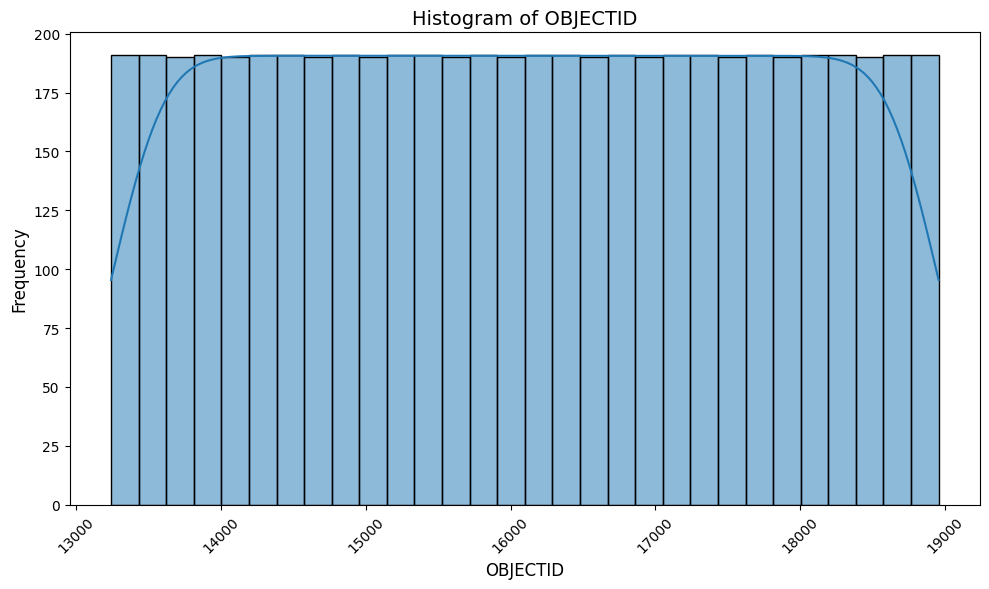

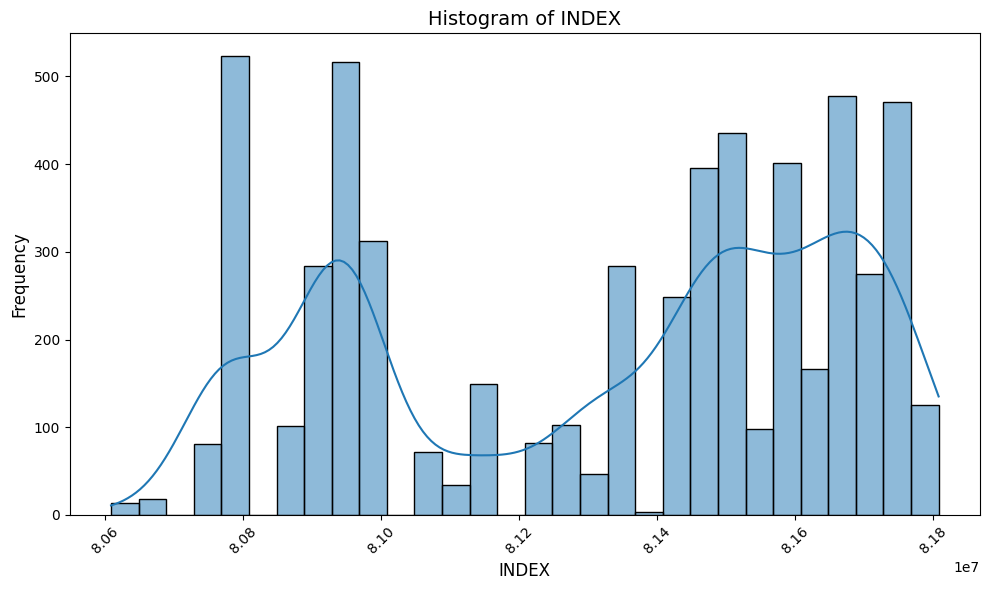

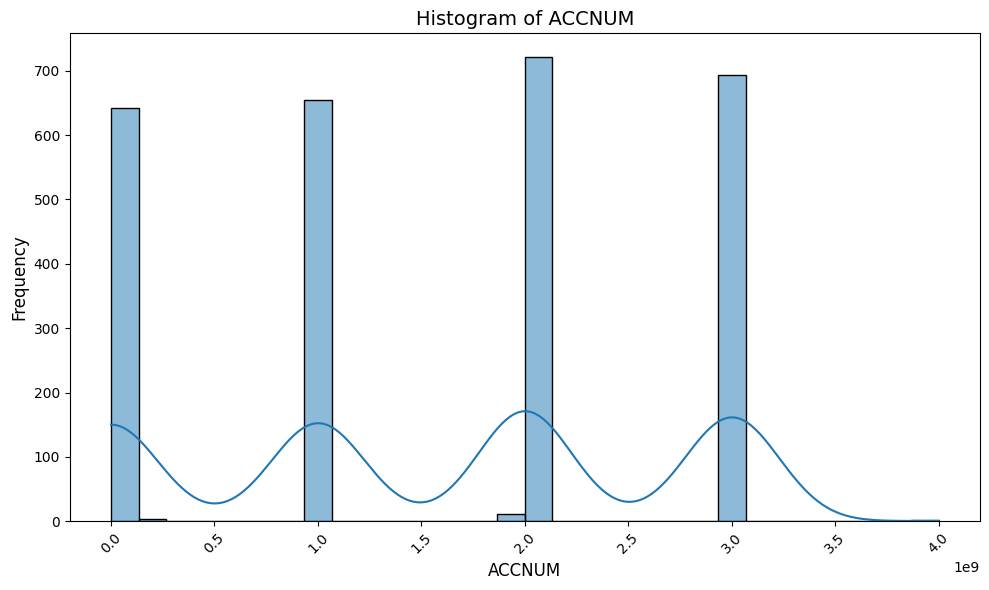

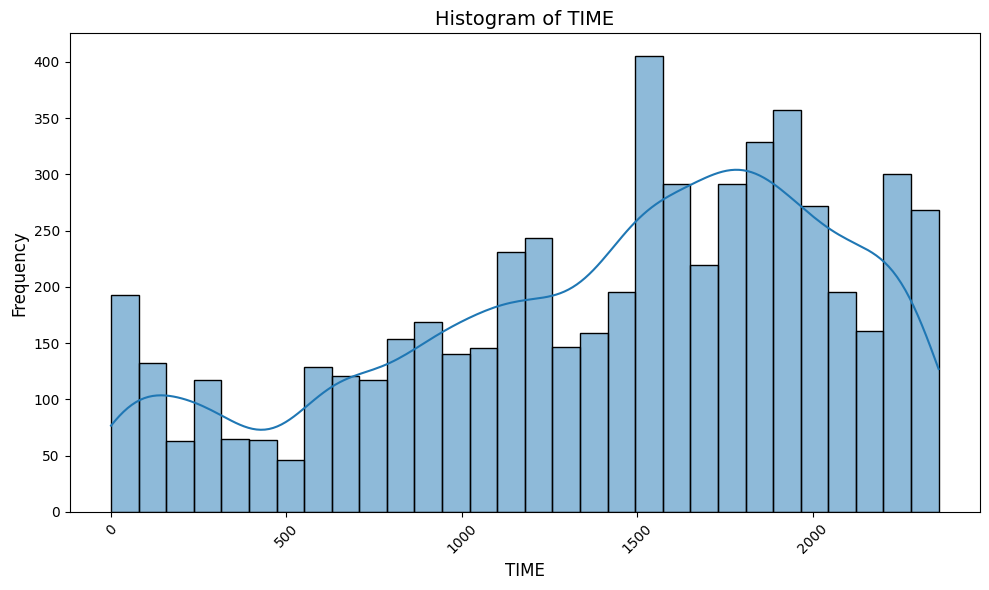

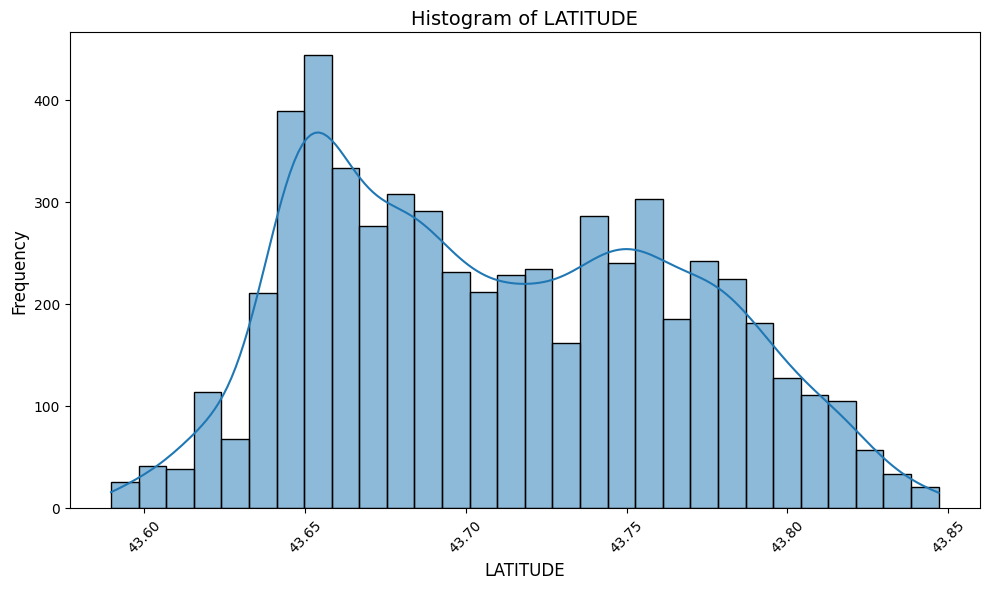

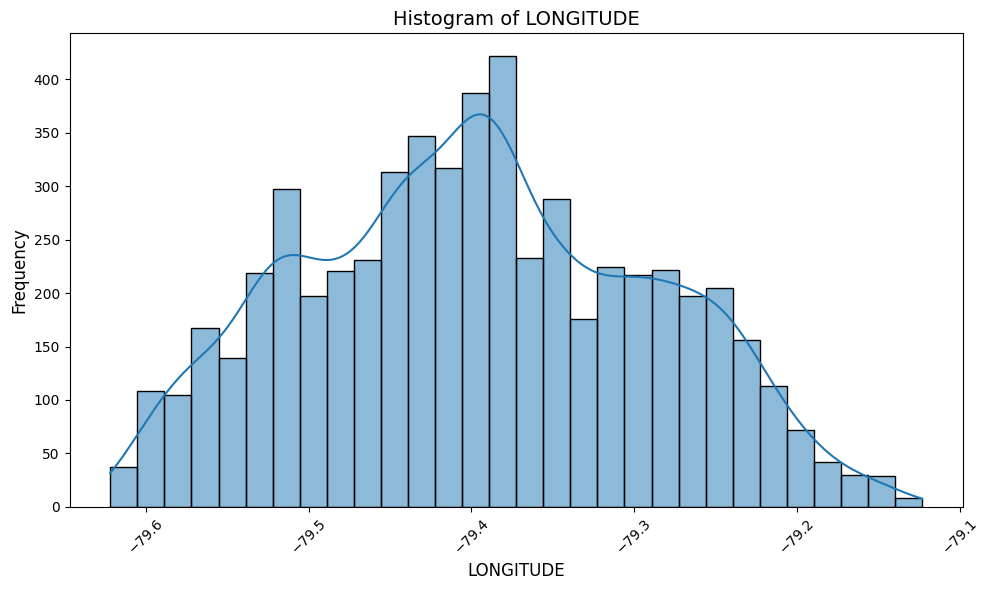

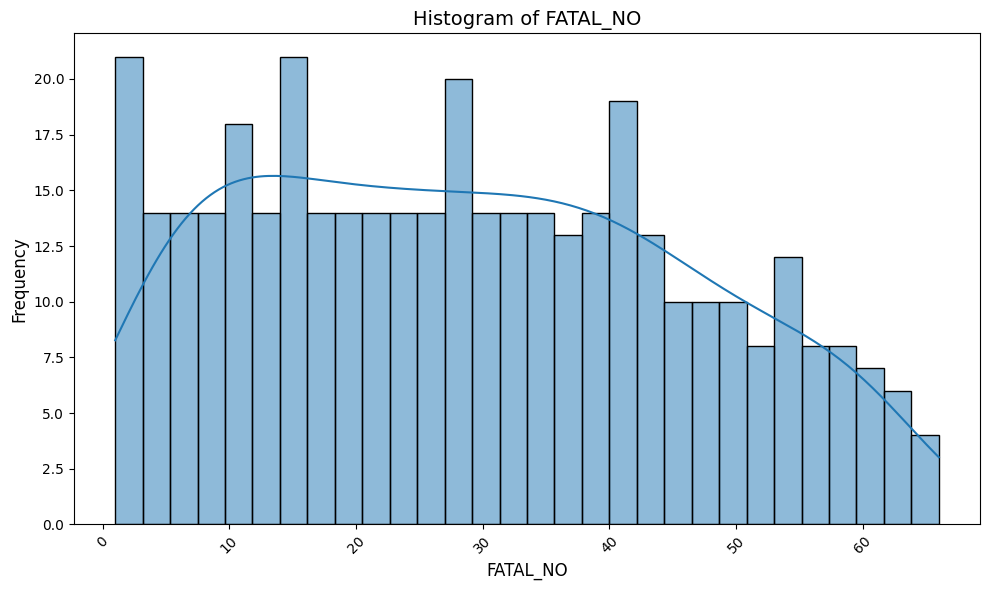

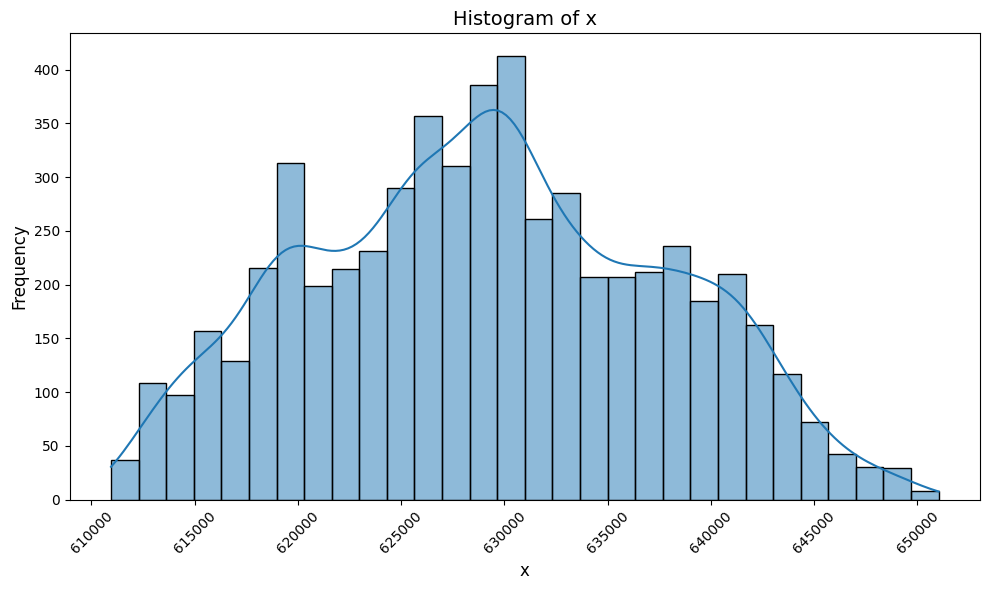

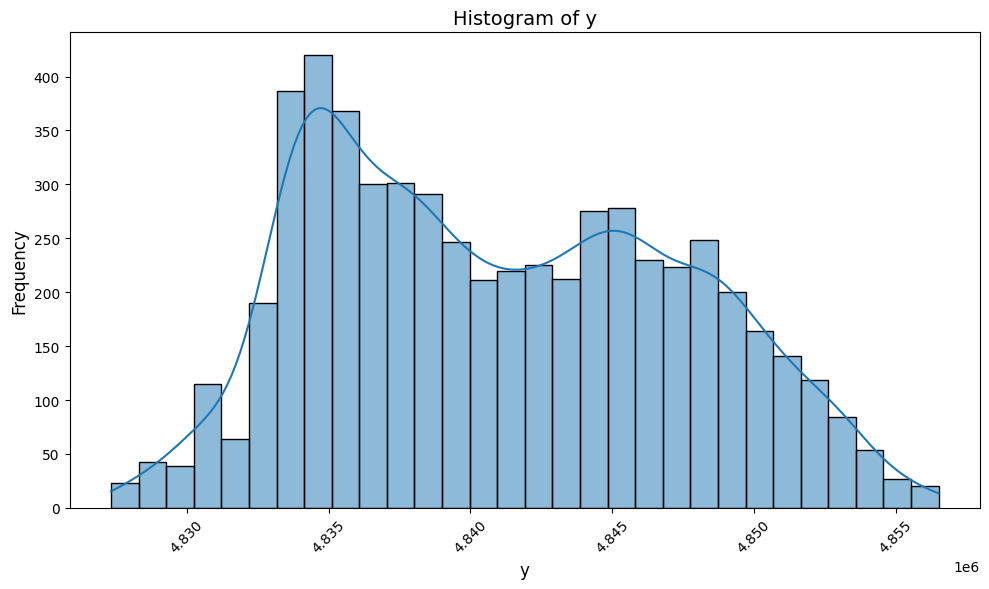

In [ ]:
#Plot Histograms for Numeric Variables
numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int8']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

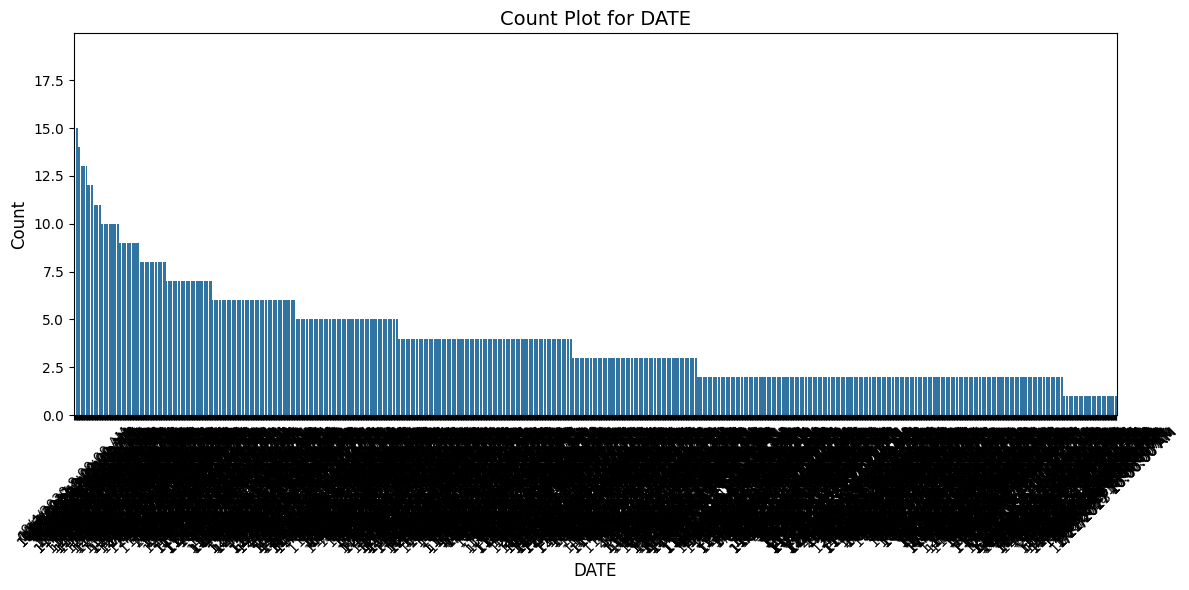

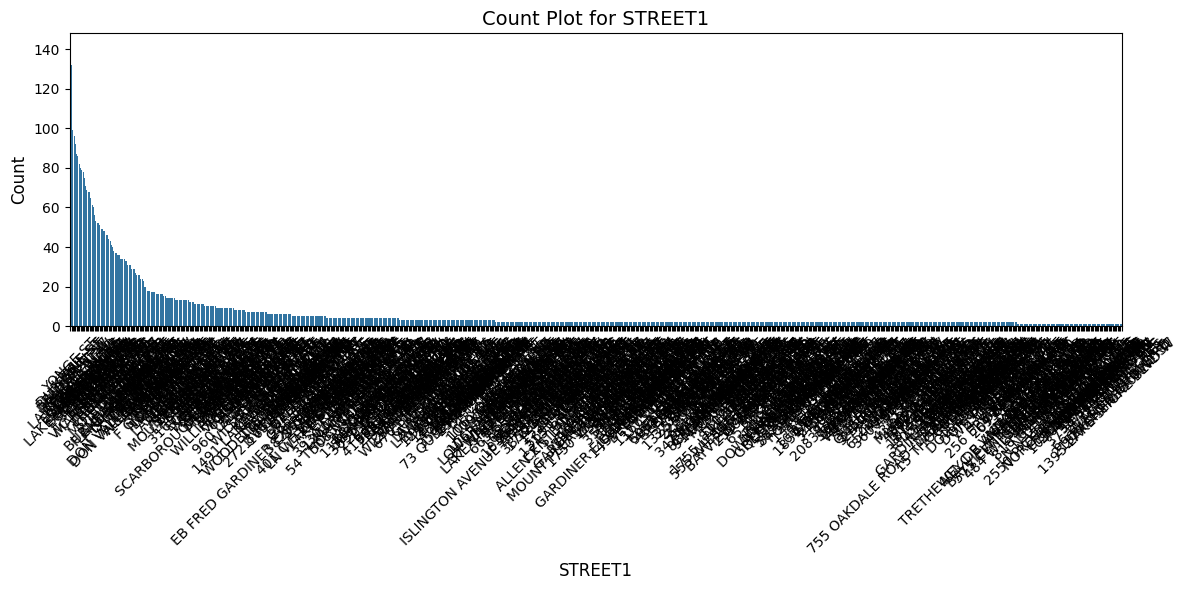

In [ ]:
#Plot Count Plots for Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))  # Increase figure size
    ax = sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f'Count Plot for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

In [21]:
#Convert some categorical columns to numerical columns
#ROAD_CLASS, DISTRICT, ACCLOC, TRAFFCTL, VISIBILITY, LIGHT, RDSFCOND, ACCLASS,
#IMPACTYPE, INVTYPE, INJURY, MANOEUVER, DRIVACT, DRICOND, PEDTYPE, PEDACT, PEDCOND,
#CYCLISTYPE, CYCACT, CYCOND, PEDESTRIAN, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK,
#TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, AG_DRIV, REDLIGHT, ALCOHOL, DISABILITY
#DIVISION

#Changing the date
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')


#Convert categorical variables to numerical variables where needed.
data['ROAD_CLASS'] = data['ROAD_CLASS'].astype('category').cat.codes
data['DISTRICT'] = data['DISTRICT'].astype('category').cat.codes
data['ACCLOC'] = data['ACCLOC'].astype('category').cat.codes
data['TRAFFCTL'] = data['TRAFFCTL'].astype('category').cat.codes
data['VISIBILITY'] = data['VISIBILITY'].astype('category').cat.codes
data['LIGHT'] = data['LIGHT'].astype('category').cat.codes
data['RDSFCOND'] = data['RDSFCOND'].astype('category').cat.codes
data['ACCLASS'] = data['ACCLASS'].astype('category').cat.codes
data['IMPACTYPE'] = data['IMPACTYPE'].astype('category').cat.codes
data['INVTYPE'] = data['INVTYPE'].astype('category').cat.codes
data['INJURY'] = data['INJURY'].astype('category').cat.codes
data['MANOEUVER'] = data['MANOEUVER'].astype('category').cat.codes
data['DRIVACT'] = data['DRIVACT'].astype('category').cat.codes
data['DRIVCOND'] = data['DRIVCOND'].astype('category').cat.codes
data['PEDTYPE'] = data['PEDTYPE'].astype('category').cat.codes
data['PEDACT'] = data['PEDACT'].astype('category').cat.codes
data['PEDCOND'] = data['PEDCOND'].astype('category').cat.codes
data['CYCLISTYPE'] = data['CYCLISTYPE'].astype('category').cat.codes
data['CYCACT'] = data['CYCACT'].astype('category').cat.codes
data['CYCCOND'] = data['CYCCOND'].astype('category').cat.codes
data['PEDESTRIAN'] = data['PEDESTRIAN'].astype('category').cat.codes
data['CYCLIST'] = data['CYCLIST'].astype('category').cat.codes
data['AUTOMOBILE'] = data['AUTOMOBILE'].astype('category').cat.codes
data['MOTORCYCLE'] = data['MOTORCYCLE'].astype('category').cat.codes
data['TRUCK'] = data['TRUCK'].astype('category').cat.codes
data['TRSN_CITY_VEH'] = data['TRSN_CITY_VEH'].astype('category').cat.codes
data['EMERG_VEH'] = data['EMERG_VEH'].astype('category').cat.codes
data['PASSENGER'] = data['PASSENGER'].astype('category').cat.codes
data['SPEEDING'] = data['SPEEDING'].astype('category').cat.codes
data['AG_DRIV'] = data['AG_DRIV'].astype('category').cat.codes
data['REDLIGHT'] = data['REDLIGHT'].astype('category').cat.codes
data['ALCOHOL'] = data['ALCOHOL'].astype('category').cat.codes
data['DISABILITY'] = data['DISABILITY'].astype('category').cat.codes
data['DIVISION'] = data['DIVISION'].astype('category').cat.codes

#Check data types
print(data.dtypes)

OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                     int8
DISTRICT                       int8
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                         int8
TRAFFCTL                       int8
VISIBILITY                     int8
LIGHT                          int8
RDSFCOND                       int8
ACCLASS                        int8
IMPACTYPE                      int8
INVTYPE                        int8
INVAGE                       object
INJURY                         int8
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                      int8
DRIVACT                        int8
DRIVCOND                    

In [13]:
#Find the Missing values for each variable, Numerical and Categorical
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
OBJECTID                0
INDEX                   0
ACCNUM               2991
DATE                    0
TIME                    0
STREET1                 0
STREET2               537
OFFSET               2956
ROAD_CLASS              0
DISTRICT                0
LATITUDE                0
LONGITUDE               0
ACCLOC                  0
TRAFFCTL                0
VISIBILITY              0
LIGHT                   0
RDSFCOND                0
ACCLASS                 0
IMPACTYPE               0
INVTYPE                 0
INVAGE                  0
INJURY                  0
FATAL_NO             5329
INITDIR              1131
VEHTYPE              2104
MANOEUVER               0
DRIVACT                 0
DRIVCOND                0
PEDTYPE                 0
PEDACT                  0
PEDCOND                 0
CYCLISTYPE              0
CYCACT                  0
CYCCOND                 0
PEDESTRIAN              0
CYCLIST                 0
AUTOMOBILE              0
MOTORCYCLE            

In [22]:
#Filling in missing values
if data['ACCNUM'].dtype == 'object':
  data['ACCNUM'] = data['ACCNUM'].fillna("Unknown")
else:
  data['ACCNUM'] = data['ACCNUM'].fillna(0)

data['OFFSET'] = data['OFFSET'].fillna(0)
data['FATAL_NO'] = data['FATAL_NO'].fillna(0)

if data['INITDIR'].dtype == 'object':
  data['INITDIR'] = data['INITDIR'].fillna("Unknown")
else:
  data['INITDIR'] = data['INITDIR'].fillna(-1)

if data['VEHTYPE'].dtype == 'object':
  data['VEHTYPE'] = data['VEHTYPE'].fillna("Unknown")
else:
  data['VEHTYPE'] = data['VEHTYPE'].fillna(-1)

if data['STREET2'].dtype == 'object':
  data['STREET2'] = data['STREET2'].fillna("Unknown")
else:
  data['STREET2'] = data['STREET2'].fillna(-1)

#Check to see if values are still missing
print("Missing values after imputation:")
print(data[['ACCNUM', 'OFFSET', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'STREET2']].isnull().sum())

Missing values after imputation:
ACCNUM      0
OFFSET      0
FATAL_NO    0
INITDIR     0
VEHTYPE     0
STREET2     0
dtype: int64


In [23]:
#Make sure Numerical and Categorical columns have no missing values
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-23-1fd2d8149956>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-23-1fd2d8149956>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [24]:
# List of columns to convert (ensure the column names match exactly)
cols_to_convert = [
    "ROAD_CLASS", "DISTRICT", "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT",
    "RDSFCOND", "ACCLASS", "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER",
    "DRIVACT", "DRIVCOND", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE",
    "CYCACT", "CYCCOND", "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE",
    "TRUCK", "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

# Convert each listed column to a categorical variable then to numeric codes
for col in cols_to_convert:
    if col in data.columns:
        data[col] = data[col].astype('category').cat.codes
    else:
        print(f"Column {col} not found in the dataset.")

# Show conversion by printing data types again
print(data.dtypes)

OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                     int8
DISTRICT                       int8
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                         int8
TRAFFCTL                       int8
VISIBILITY                     int8
LIGHT                          int8
RDSFCOND                       int8
ACCLASS                        int8
IMPACTYPE                      int8
INVTYPE                        int8
INVAGE                       object
INJURY                         int8
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                      int8
DRIVACT                        int8
DRIVCOND                    

In [25]:
#Convert categorical variables to numerical varaibles
cols_to_convert = [
    "ROAD_CLASS", "DISTRICT", "ACCLOC", "TRAFFCTL", "VISIBILITY", "LIGHT",
    "RDSFCOND", "ACCLASS", "IMPACTYPE", "INVTYPE", "INJURY", "MANOEUVER",
    "DRIVACT", "DRIVCOND", "PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE",
    "CYCACT", "CYCCOND", "PEDESTRIAN", "CYCLIST", "AUTOMOBILE", "MOTORCYCLE",
    "TRUCK", "TRSN_CITY_VEH", "EMERG_VEH", "PASSENGER", "SPEEDING", "AG_DRIV",
    "REDLIGHT", "ALCOHOL", "DISABILITY", "DIVISION"
]

for col in cols_to_convert:
    if col in data.columns:
        # Attempt to convert to numeric; non-numeric values become NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Replace NaN with 0
        data[col] = data[col].fillna(0)
        # Convert the column to integer type
        data[col] = data[col].astype(int)
    else:
        print(f"Column '{col}' not found in the dataset.")

print(data.dtypes)


OBJECTID                      int64
INDEX                         int64
ACCNUM                      float64
DATE                 datetime64[ns]
TIME                          int64
STREET1                      object
STREET2                      object
OFFSET                       object
ROAD_CLASS                    int64
DISTRICT                      int64
LATITUDE                    float64
LONGITUDE                   float64
ACCLOC                        int64
TRAFFCTL                      int64
VISIBILITY                    int64
LIGHT                         int64
RDSFCOND                      int64
ACCLASS                       int64
IMPACTYPE                     int64
INVTYPE                       int64
INVAGE                       object
INJURY                        int64
FATAL_NO                    float64
INITDIR                      object
VEHTYPE                      object
MANOEUVER                     int64
DRIVACT                       int64
DRIVCOND                    


Spearman Correlation Matrix:
               OBJECTID     INDEX    ACCNUM      TIME  ROAD_CLASS  DISTRICT  \
OBJECTID       1.000000  0.978175  0.924811  0.064791   -0.071278 -0.049373   
INDEX          0.978175  1.000000  0.907774  0.052181   -0.082679 -0.058740   
ACCNUM         0.924811  0.907774  1.000000  0.065596   -0.079591 -0.054104   
TIME           0.064791  0.052181  0.065596  1.000000    0.038174 -0.042395   
ROAD_CLASS    -0.071278 -0.082679 -0.079591  0.038174    1.000000  0.155925   
DISTRICT      -0.049373 -0.058740 -0.054104 -0.042395    0.155925  1.000000   
LATITUDE      -0.079557 -0.085314 -0.076515  0.049708   -0.003602 -0.148982   
LONGITUDE     -0.032331 -0.040555 -0.048830  0.005533    0.072097  0.537498   
ACCLOC         0.171851  0.172348  0.208294  0.010496   -0.149927 -0.019230   
TRAFFCTL       0.047691  0.042692  0.038683 -0.039658    0.086411  0.007753   
VISIBILITY    -0.022037 -0.020824 -0.013296  0.061573   -0.030107  0.027488   
LIGHT         -0.02422

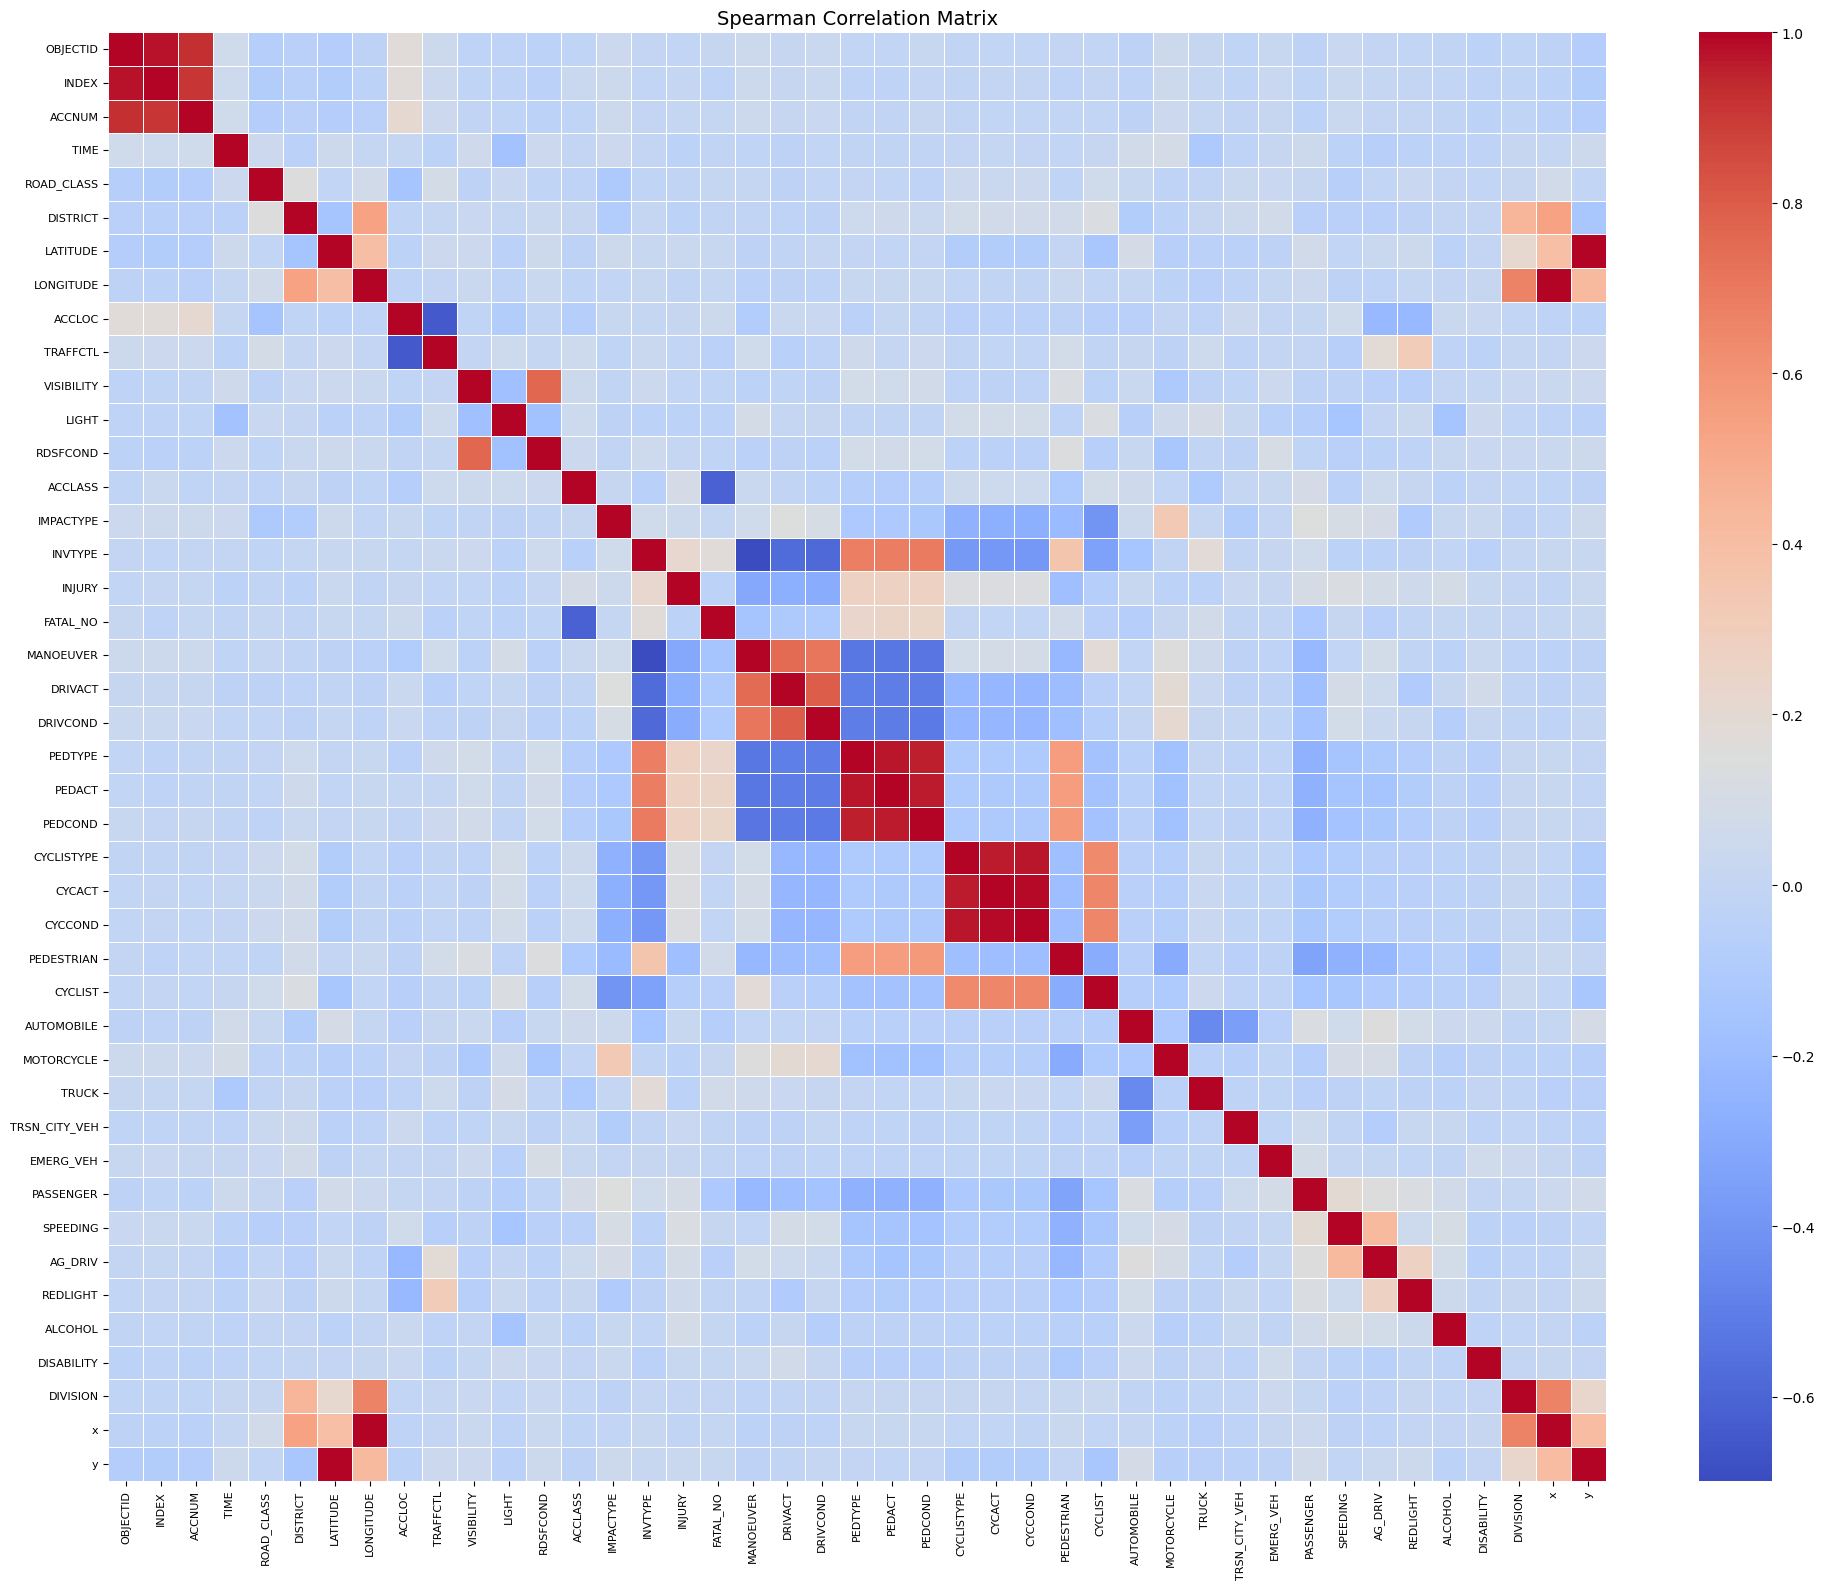

In [26]:
# Extract numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Computing Spearman correlation matrix
spearman_corr = data[numeric_cols].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Visualizing Spearman correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(spearman_corr, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)
plt.title("Spearman Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
print("Skew for normality")
print(data[numeric_cols].skew())  # Should be close to 0 for normality
print("Kurtosis for normality")
print(data[numeric_cols].kurtosis())  # Should be ~ 3 for normality

Skew for normality
OBJECTID          0.000000
INDEX            -0.334387
ACCNUM            1.109513
TIME             -0.568899
ROAD_CLASS       -0.997645
DISTRICT         -0.211059
LATITUDE          0.226495
LONGITUDE         0.095906
ACCLOC            0.419962
TRAFFCTL          0.095283
VISIBILITY        2.512568
LIGHT            -0.105829
RDSFCOND          1.848994
ACCLASS          -1.728162
IMPACTYPE         0.330302
INVTYPE           0.256792
INJURY            0.503383
FATAL_NO          4.851244
MANOEUVER         1.319761
DRIVACT           1.330528
DRIVCOND         -0.059657
PEDTYPE           2.335823
PEDACT            2.593430
PEDCOND           1.654920
CYCLISTYPE        5.549438
CYCACT            7.624622
CYCCOND           4.555300
PEDESTRIAN        0.294527
CYCLIST           2.582260
AUTOMOBILE       -2.696496
MOTORCYCLE        2.251266
TRUCK             3.780877
TRSN_CITY_VEH     3.747040
EMERG_VEH        12.856849
PASSENGER         0.425955
SPEEDING          1.766153
AG_DRIV  

Top correlations with Fatality:
 FATAL_NO      1.000000
PEDCOND       0.224636
PEDACT        0.215259
PEDTYPE       0.160133
INVTYPE       0.145623
Month         0.133202
VEHTYPE       0.113511
INVAGE        0.100805
PEDESTRIAN    0.071256
TRUCK         0.057127
Name: FATAL_NO, dtype: float64


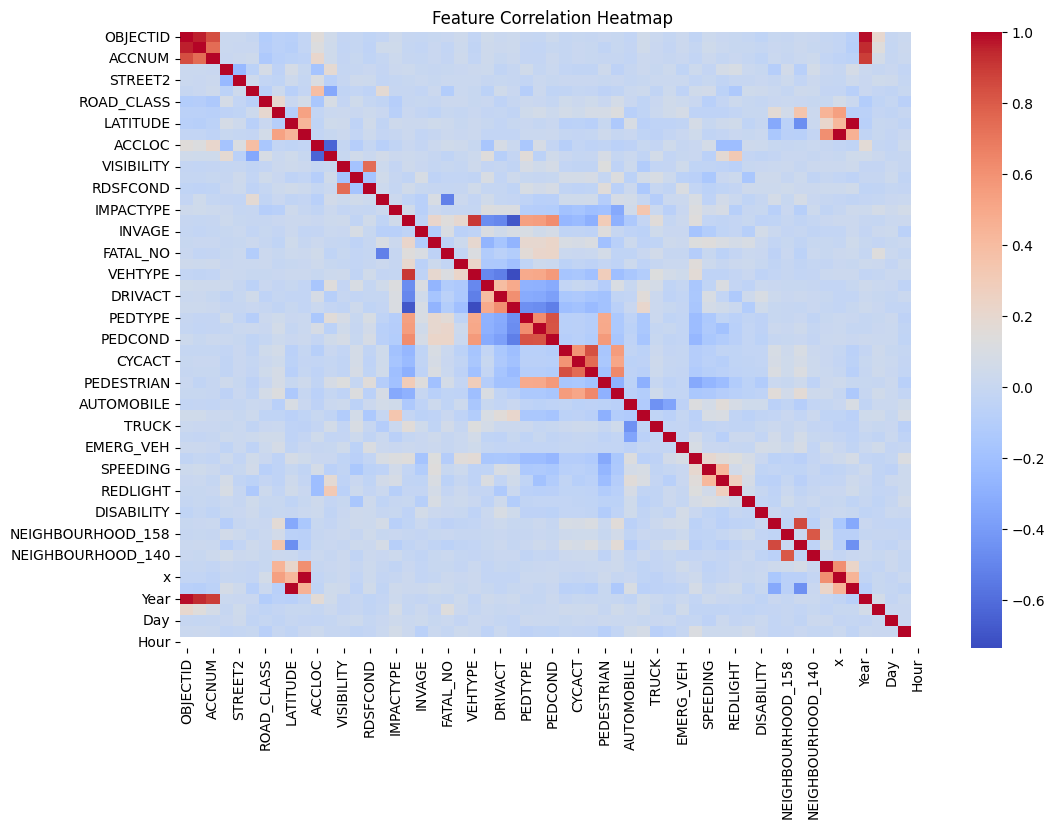

In [39]:
# Compute correlations with the target variable
corr_with_target = df.corr()["FATAL_NO"].sort_values(ascending=False)

# Display top correlations
print("Top correlations with Fatality:\n", corr_with_target.head(10))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Data (Assuming 'data' is already cleaned)
df = data.copy()

# Convert categorical features to numeric
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Convert 'DATE' & 'TIME' to numeric features
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df["Year"] = df["DATE"].dt.year
df["Month"] = df["DATE"].dt.month
df["Day"] = df["DATE"].dt.day
df["Weekday"] = df["DATE"].dt.weekday
df["Hour"] = pd.to_datetime(df["TIME"], errors="coerce").dt.hour

# Drop original datetime columns
df = df.drop(columns=["DATE", "TIME"], errors="ignore")

# Define Features (X) and Target (y)
X = df.drop(columns=["FATAL_NO"])  # Features
y = (df["FATAL_NO"] > 0).astype(int)  # Target (Binary)

# Check class distribution
print(df["FATAL_NO"].value_counts(normalize=True))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



FATAL_NO
0.0     0.931806
11.0    0.001923
1.0     0.001224
2.0     0.001224
3.0     0.001224
          ...   
61.0    0.000525
62.0    0.000525
64.0    0.000350
65.0    0.000175
66.0    0.000175
Name: proportion, Length: 67, dtype: float64


In [41]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
 FATAL_NO
0    4263
1    4263
Name: count, dtype: int64


In [42]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1066
           1       0.79      0.82      0.81        78

    accuracy                           0.97      1144
   macro avg       0.89      0.90      0.90      1144
weighted avg       0.97      0.97      0.97      1144

ROC-AUC: 0.992134507143888


In [43]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]))

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0


In [44]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      0.96      0.98        78

    accuracy                           1.00      1144
   macro avg       1.00      0.98      0.99      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 0.9999999999999999


<ipython-input-45-e3604b00e31c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="viridis")


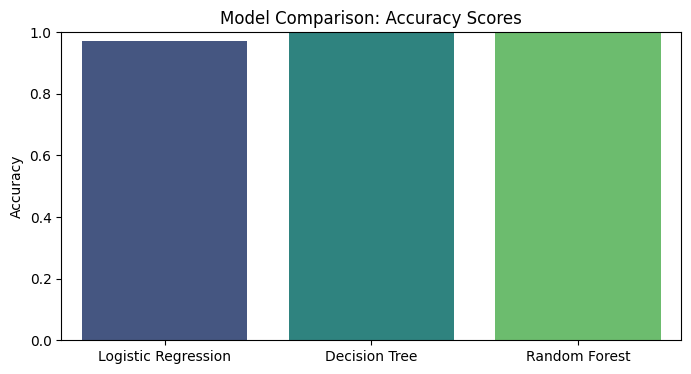

In [45]:
# Compare Models Using Accuracy Scores
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy_scores = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]

#Visualize and Compare Accuracy Scores
plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")
plt.title("Model Comparison: Accuracy Scores")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [49]:
#Feature Selection
from sklearn.feature_selection import RFE
df = data.copy()
# Convert categorical features to numeric
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype("category").cat.codes)

# Convert 'DATE' & 'TIME' to numeric features
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df["Year"] = df["DATE"].dt.year
df["Month"] = df["DATE"].dt.month
df["Day"] = df["DATE"].dt.day
df["Weekday"] = df["DATE"].dt.weekday
df["Hour"] = pd.to_datetime(df["TIME"], errors="coerce").dt.hour

# Drop original datetime columns
df = df.drop(columns=["DATE", "TIME"], errors="ignore")

# Define Features (X) and Target (y)
X = df.drop(columns=["FATAL_NO"])  # Features
y = (df["FATAL_NO"] > 0).astype(int)  # Target (Binary)

# Check class distribution
print(df["FATAL_NO"].value_counts(normalize=True))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize Data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


FATAL_NO
0.0     0.931806
11.0    0.001923
1.0     0.001224
2.0     0.001224
3.0     0.001224
          ...   
61.0    0.000525
62.0    0.000525
64.0    0.000350
65.0    0.000175
66.0    0.000175
Name: proportion, Length: 67, dtype: float64


In [57]:
#Filtered Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_scaled, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Logistic Regression:", selected_features)

#Train a New Logistic Regression Model with Selected Features
log_reg_selected = LogisticRegression(max_iter=1000)
log_reg_selected.fit(X_train_scaled[:, rfe.support_], y_train)
y_pred_log_selected = log_reg_selected.predict(X_test_scaled[:, rfe.support_])
print("Logistic Regression Results with Selected Features:")
print(classification_report(y_test, y_pred_log_selected))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_selected.predict_proba(X_test_scaled[:, rfe.support_])[:, 1]))


Selected Features for Logistic Regression: Index(['ACCLASS', 'INJURY', 'MANOEUVER', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'PASSENGER'],
      dtype='object')
Logistic Regression Results with Selected Features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1066
           1       0.78      0.79      0.79        78

    accuracy                           0.97      1144
   macro avg       0.88      0.89      0.89      1144
weighted avg       0.97      0.97      0.97      1144

ROC-AUC: 0.9920022129215376


In [58]:
#Filtered Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rfe = RFE(tree_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Decision Tree:", selected_features)

#Train a New Decision Tree Model with Selected Features
tree_model_selected = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_selected.fit(X_train[selected_features], y_train)
y_pred_tree_selected = tree_model_selected.predict(X_test[selected_features])
print("Decision Tree Results with Selected Features:")
print(classification_report(y_test, y_pred_tree_selected))
print("ROC-AUC:", roc_auc_score(y_test, tree_model_selected.predict_proba(X_test[selected_features])[:, 1]))


Selected Features for Decision Tree: Index(['OBJECTID', 'STREET2', 'ACCLASS', 'INJURY', 'INITDIR', 'y', 'Month',
       'Day', 'Weekday', 'Hour'],
      dtype='object')
Decision Tree Results with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0


In [59]:
#Filtered Random Forest
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfe = RFE(rand_forest, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features for Random Forest:", selected_features)

#Train a New Random Forest Model with Selected Features
rand_forest_selected = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rand_forest_selected.fit(X_train[selected_features], y_train)
y_pred_rf_selected = rand_forest_selected.predict(X_test[selected_features])
print("Random Forest Results with Selected Features:")
print(classification_report(y_test, y_pred_rf_selected))
print("ROC-AUC:", roc_auc_score(y_test, rand_forest_selected.predict_proba(X_test[selected_features])[:, 1]))


Selected Features for Random Forest: Index(['OBJECTID', 'INDEX', 'ACCLASS', 'INVTYPE', 'INVAGE', 'INJURY',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND'],
      dtype='object')
Random Forest Results with Selected Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       1.00      1.00      1.00        78

    accuracy                           1.00      1144
   macro avg       1.00      1.00      1.00      1144
weighted avg       1.00      1.00      1.00      1144

ROC-AUC: 1.0
